**Time Series Analysis in Superstore Sales Data**


This project focused on analyzing the annual sales trends and identifying seasonal patterns in Superstore sales data using Time Series Analysis.



##### **Data Preprocessing**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Dataset/train.csv"
df = pd.read_csv(path)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [ ]:
#Cek kesesuaian format data dan cek data missing
df.info()
print("=========================")
print("Jumlah missing data:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
#Cek Data Duplikat
duplicate_rows = df[df.duplicated()]
print("Jumlah data duplikat:", len(duplicate_rows))

Jumlah data duplikat: 0


In [ ]:
#Mengubah format data
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")

In [ ]:
#Memastikan format data sudah berubah dan sesuai
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

##### **Sales Time Series Analysis**

**Sales Time Series Analysis - Yearly**

In [ ]:
#Mengelompokkan total penjualan per tahun
df["Order Year"] = df["Order Date"].dt.year
sales_by_year = df.groupby("Order Year")["Sales"].sum()
sales_by_year

,Sales
Order Year,
2015,479856.2081
2016,459436.0054
2017,600192.5500
2018,722052.0192


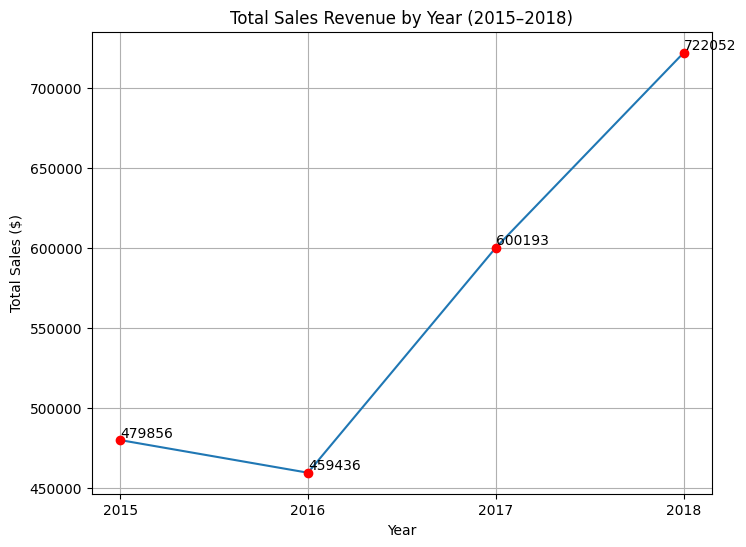

Terjadi peningkatan total pendapatan penjualan dari tahun ke tahun sejak 2016


In [ ]:
#Time Series Visualization
plt.figure(figsize=(8,6))
plt.plot(sales_by_year.index, sales_by_year.values, marker="o", markeredgecolor = "red", markerfacecolor = "red")
plt.xticks(sales_by_year.index.astype(int))

for i, value in enumerate(sales_by_year.values):
  plt.text(sales_by_year.index[i], value, str(round(value)), va = "bottom")

plt.xlabel("Year")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales Revenue by Year (2015–2018)")
plt.grid(True)
plt.show()

print("Terjadi peningkatan total pendapatan penjualan dari tahun ke tahun sejak 2016")

**Sales Time Series Analysis - Monthly**


untuk mengetahui tren yang lebih detail

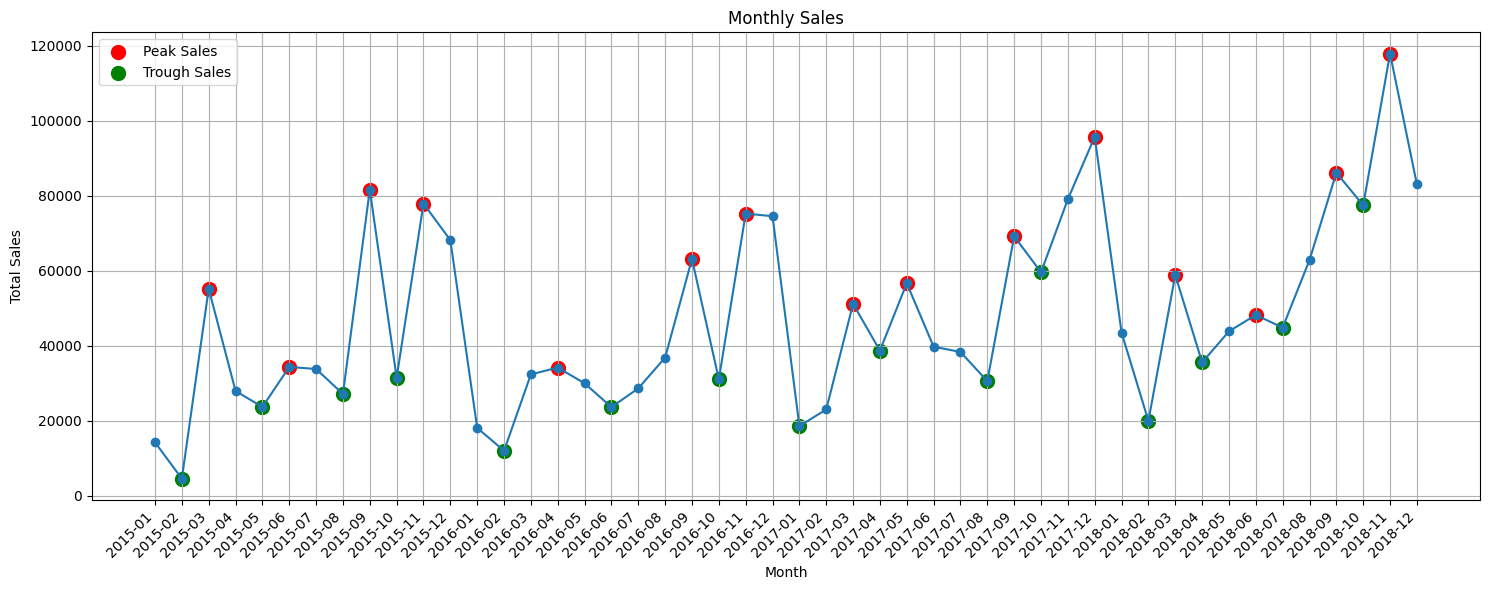

Terdapat kecenderungan pengingkatan pendapatan setiap akhir tahun dan sekitar bulan Maret


In [ ]:
df["Order Month"] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Order Month')['Sales'].sum()

plt.figure(figsize=(15, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

from scipy.signal import find_peaks
peaks, _ = find_peaks(monthly_sales.values, prominence=8)
plt.scatter(monthly_sales.index[peaks].astype(str), monthly_sales.values[peaks], color='red', label='Peak Sales', s=100)
troughs, _ = find_peaks(-monthly_sales.values, prominence=10)
plt.scatter(monthly_sales.index[troughs].astype(str), monthly_sales.values[troughs], color='green', label='Trough Sales', s=100)
plt.legend()
plt.tight_layout()
plt.show()

print("Terdapat kecenderungan peningkatan pendapatan setiap akhir tahun dan sekitar bulan Maret")